In [97]:
import os
import numpy as np
from dt_code import SpectraReduction, DTAnalysis
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

### Load in spectra

In [2]:
# Reduced data with a wavelength solution and errors
directory = '/Users/arcticfox/Downloads/gemini_data/'
ref_file = '/Users/arcticfox/Documents/atmospheres/v1298tau/data/N20200122G0066m.fits'

# Set reload_reduced = True if spectra were previously saved
dt_obj = SpectraReduction(fn_dir=directory,
                           ref_file=ref_file, reload_reduced=True)

### Analysis class

In [4]:
analysis = DTAnalysis(dt_obj.interp_wavelengths,
                      dt_obj.interp_spectra,
                      dt_obj.interp_errors,
                      dt_obj.interp_orders,
                      dt_obj.times)

In [5]:
# Planet/Transit parameters
# Order = T0, period, rp/rstar, a/rstar, i, e, omega, u1, u2
params = [2458846.097156, 8.24958, 0.0381, 13.19, 89., 0.0, 90.0, 0.591, 0.098]
analysis.transit_phases(params)

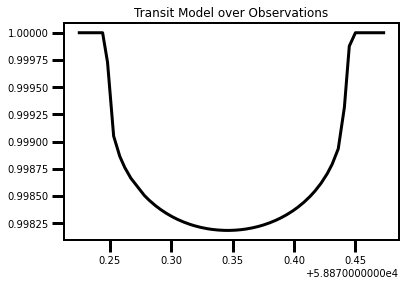

In [6]:
plt.plot(analysis.obstimes.value, analysis.lc, 'k', lw=3)
plt.title('Transit Model over Observations');

### Excess Absorption for H-alpha

In [141]:
w, e = analysis.measure_excess([655.4,655.9], temptype='oot', mask=True)

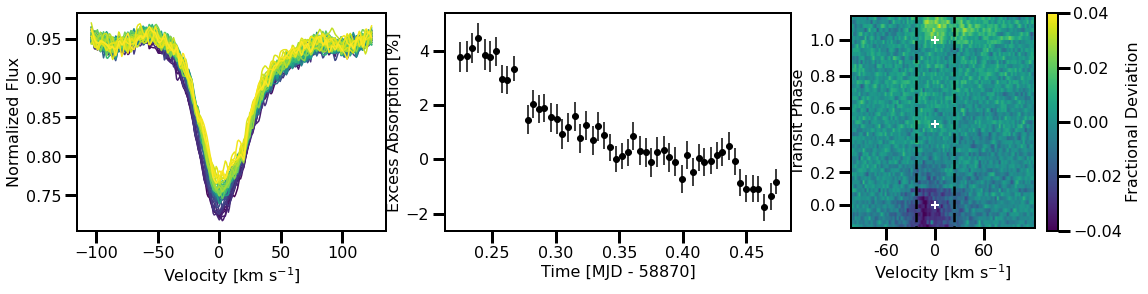

In [142]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,4),
                                    gridspec_kw={'width_ratios':[2,2.25,1.5]})

analysis.plotting_lines([655.4,655.9], ax=ax1, xaxis='velocity')
ax2.errorbar(analysis.obstimes.value-58870, w, yerr=e, color='k', fmt='o')
ax2.set_ylabel('Excess Absorption [%]')
ax2.set_xlabel('Time [MJD - 58870]')
out = analysis.expanding_bins([655.4,655.9], plot=True, vsini=23, ax=ax3, repeat=6,
                              vlim=0.04, temptype='med')

### Weighted Mean for Ca II

In [205]:
ca_reg = np.array([[847.03, 847.64],
                  [853.55, 854.35],
                  [863.78, 864.6]])
li_reg = [680.12, 680.33]

f_ca, e_ca = analysis.weighted_means(ca_reg)
f_li, e_li = analysis.weighted_means(li_reg)

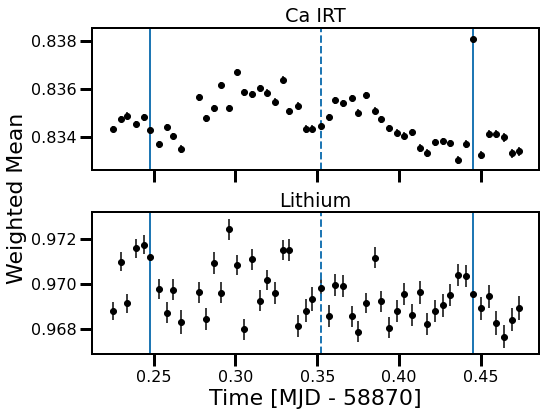

In [232]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)
ax1.errorbar(analysis.obstimes.value-58870, f_ca, yerr=e_ca, 
             color='k', fmt='o')
ax2.errorbar(analysis.obstimes.value-58870, f_li, yerr=e_li,
             color='k', fmt='o')
ax2.set_title('Lithium')
ax1.set_title('Ca IRT')
ax2.set_ylabel('Weighted Mean', y=1.1, fontsize=22)
ax2.set_xlabel('Time [MJD - 58870]', fontsize=22)

t_phases = np.where(np.isnan(analysis.phase)==False)[0]
linestyle=['-', '--', '-']
for i, p in enumerate([t_phases[0], t_phases[int(len(t_phases)/2)], t_phases[-1]]):
    ax1.axvline(analysis.obstimes.value[p]-58870, 0, 1, linestyle=linestyle[i], lw=2)
    ax2.axvline(analysis.obstimes.value[p]-58870, 0, 1, linestyle=linestyle[i], lw=2)
    
plt.subplots_adjust(hspace=0.3);